In [49]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load datasets
df = pd.read_csv('all2.csv')

# Mapping

In [51]:
df['Occupational Category of Person Affected'].unique()

array(['Nurse (RN, LPN), Nurse (RN, LPN)',
       'Nurse (RN, LPN), Security, Allied Health/Technologist',
       'Nurse (RN, LPN), Physician/Advanced Practice Provider, Allied Health/Technologist, Security',
       'Nurse (RN, LPN)', 'Nurse (RN, LPN), Security',
       'Nurse (RN, LPN), Other', 'Other', 'Security',
       'Nurse (RN, LPN), Security, Other',
       'Nurse (RN, LPN), Physician/Advanced Practice Provider, Security',
       'Nurse (RN, LPN), Physician/Advanced Practice Provider',
       'Allied Health/Technologist', 'Administration/Support Services',
       'Nurse (RN, LPN), Physician/Advanced Practice Provider, Allied Health/Technologist',
       'Physician/Advanced Practice Provider, Nurse (RN, LPN), Allied Health/Technologist, Security',
       'Nurse (RN, LPN), Physician/Advanced Practice Provider, Security, Allied Health/Technologist',
       'Facilities/Plant Operations, Security, Other',
       'Nurse (RN, LPN), Allied Health/Technologist',
       'Nurse (RN, LPN),

In [73]:
def split_roles(s):
    if pd.isnull(s):
        return []
    parts = re.split(r',\s*(?![^()]*\))', s)
    return [part.strip() for part in parts if part.strip()]

def get_general_role(role):
    if pd.isnull(role) or not role.strip():
        return ''
    # Remove content within parentheses
    role_clean = re.sub(r'\(.*?\)', '', role).strip()
    # Split on '/' and take first part
    role_clean = role_clean.split('/')[0].strip()
    # Split on '-' and take first part
    role_clean = role_clean.split('-')[0].strip()
    if not role_clean:
        return ''
    role_lower = role_clean.lower()
    # Determine the general role based on keywords
    if 'nurse' in role_lower or 'np' in role_lower:
        return 'Nurse'
    elif 'physician' in role_lower or 'practitioner' in role_lower or 'app' in role_lower:
        return 'Physician/APP'
    elif 'security' in role_lower:
        return 'Security'
    elif 'allied health' in role_lower:
        return 'Allied Health'
    elif 'technologist' in role_lower or 'technician' in role_lower:
        return 'Technologist/Technician'
    elif 'administrat' in role_lower or 'registration' in role_lower or 'receptionist' in role_lower or 'mgr' in role_lower or 'manager' in role_lower or 'supv' in role_lower:
        return 'Admin/Management'
    elif 'patient' in role_lower:
        return 'Patient'
    elif 'family' in role_lower:
        return 'Family'
    elif 'emt' in role_lower or 'paramedic' in role_lower:
        return 'EMT/Paramedic'
    elif 'therapist' in role_lower:
        return 'Therapist'
    elif 'social worker' in role_lower:
        return 'Social Worker'
    elif 'facilities' in role_lower or 'plant operations' in role_lower:
        return 'Facilities'
    elif 'midwife' in role_lower:
        return 'Midwife'
    elif 'police' in role_lower:
        return 'Police'
    elif 'staff' in role_lower:
        return 'Staff'
    elif 'cna' in role_lower or 'nursing' in role_lower:
        return 'Nursing Assistant'
    elif 'psych' in role_lower or 'mental' in role_lower:
        return 'Mental Health'
    elif 'rehabilitation' in role_lower:
        return 'Rehabilitation'
    else:
        print(role_lower)
        return 'Other'

In [74]:
# Assuming 'all_dates' is the DataFrame with the required columns
# Split the occupational categories into individual roles
df['Split Roles'] = df['Occupational Category of Person Affected'].apply(split_roles)

In [75]:
# Explode the list of roles into separate rows
exploded_df = df.explode('Split Roles').reset_index(drop=True)

# Apply the general role categorization
exploded_df['General Role'] = exploded_df['Split Roles'].apply(get_general_role)

other
other
other
other
other
other
other
dhs
telecommunications operator
logistic transport specialist
other
clinical assistant
logistic transport specialist
other
medical assistant ii
other
other
other
other
other
clinical assistant
other
other
other
other
other
other
other
other
other
other
education
other
other
other
other
other


In [76]:
exploded_df['General Role'].unique()
# exploded_df.head()

array(['Nurse', 'Security', 'Allied Health', 'Physician/APP', 'Other',
       'Admin/Management', 'Facilities', 'Staff', 'Family', 'Patient',
       'Police', 'Midwife', 'EMT/Paramedic', 'Technologist/Technician',
       'Nursing Assistant', '', 'Mental Health', 'Therapist',
       'Social Worker', 'Rehabilitation'], dtype=object)

In [77]:
exploded_df['General Role'].unique()

array(['Nurse', 'Security', 'Allied Health', 'Physician/APP', 'Other',
       'Admin/Management', 'Facilities', 'Staff', 'Family', 'Patient',
       'Police', 'Midwife', 'EMT/Paramedic', 'Technologist/Technician',
       'Nursing Assistant', '', 'Mental Health', 'Therapist',
       'Social Worker', 'Rehabilitation'], dtype=object)

In [79]:
exploded_df.to_csv('all_split_role.csv', index=False)

# Graph

## Before changing other

<ipython-input-25-9d71bf5ed65c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')


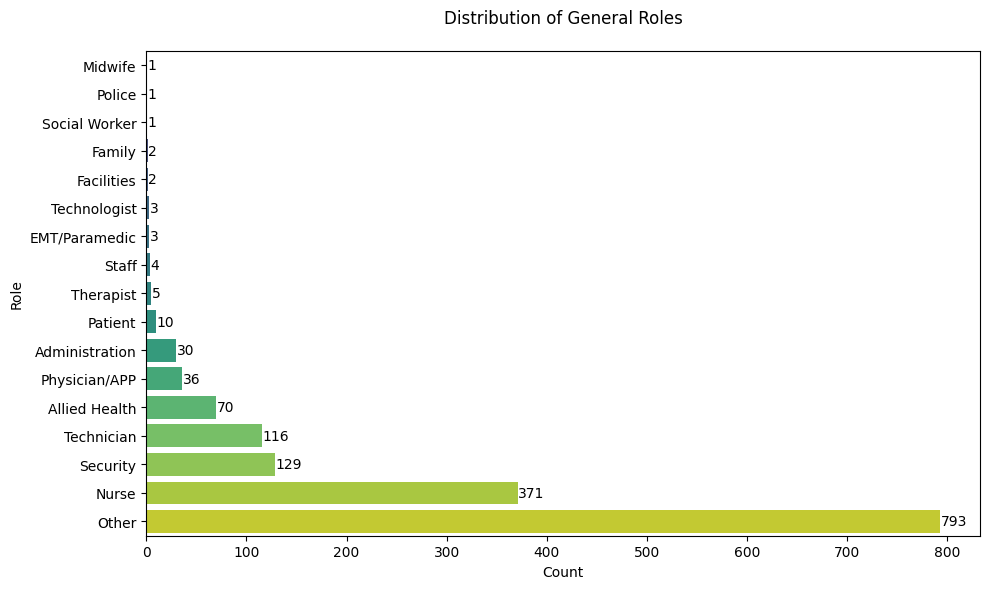

In [25]:
# Get value counts and sort
role_counts = exploded_df['General Role'].value_counts().sort_values(ascending=True)

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')

# Add annotations
for i, v in enumerate(role_counts.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.title('Distribution of General Roles', pad=20)
plt.xlabel('Count')
plt.ylabel('Role')
plt.tight_layout()
plt.show()

In [28]:
!pip install squarify

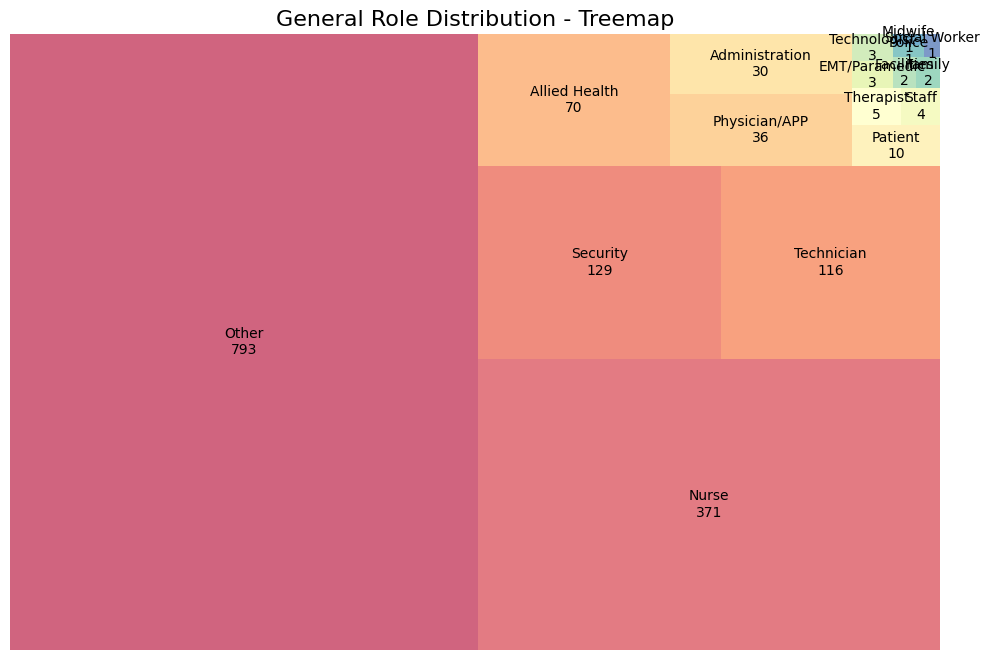

In [29]:
import squarify

# Prepare data
role_counts = exploded_df['General Role'].value_counts()

# Create treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=role_counts.values,
              label=[f'{label}\n{count}' for label, count in zip(role_counts.index, role_counts.values)],
              color=sns.color_palette('Spectral', len(role_counts)),
              alpha=0.7)
plt.title('General Role Distribution - Treemap', fontsize=16)
plt.axis('off')
plt.show()

In [31]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 31.7 MB/s eta 0:00:00


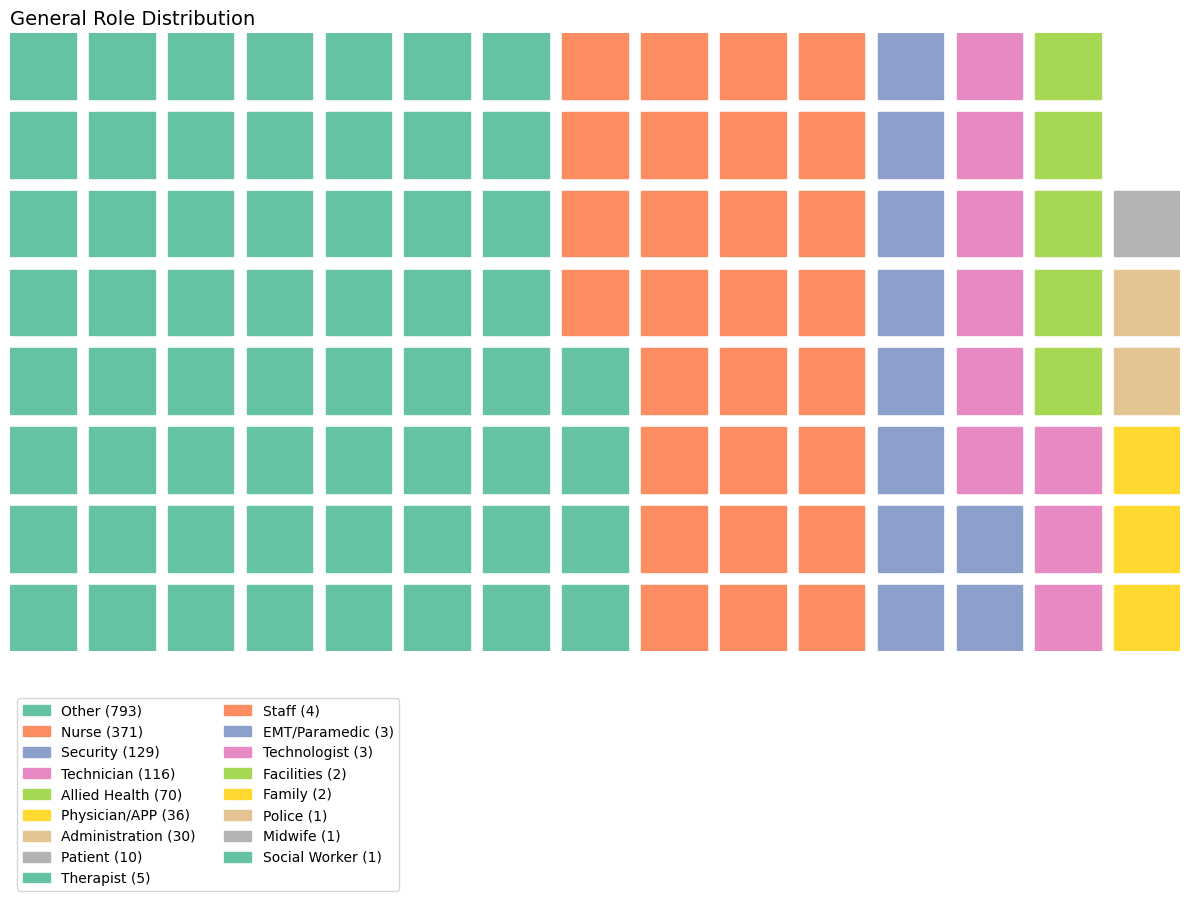

In [32]:
from pywaffle import Waffle

role_counts = exploded_df['General Role'].value_counts()

plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=15,
    values=role_counts.to_dict(),
    title={'label': 'General Role Distribution', 'loc': 'left', 'fontsize': 14},
    labels=[f"{k} ({v})" for k, v in role_counts.to_dict().items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2},
    figsize=(12, 8)
)
plt.tight_layout()
plt.show()

## after

<ipython-input-78-f27a20dc7925>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')


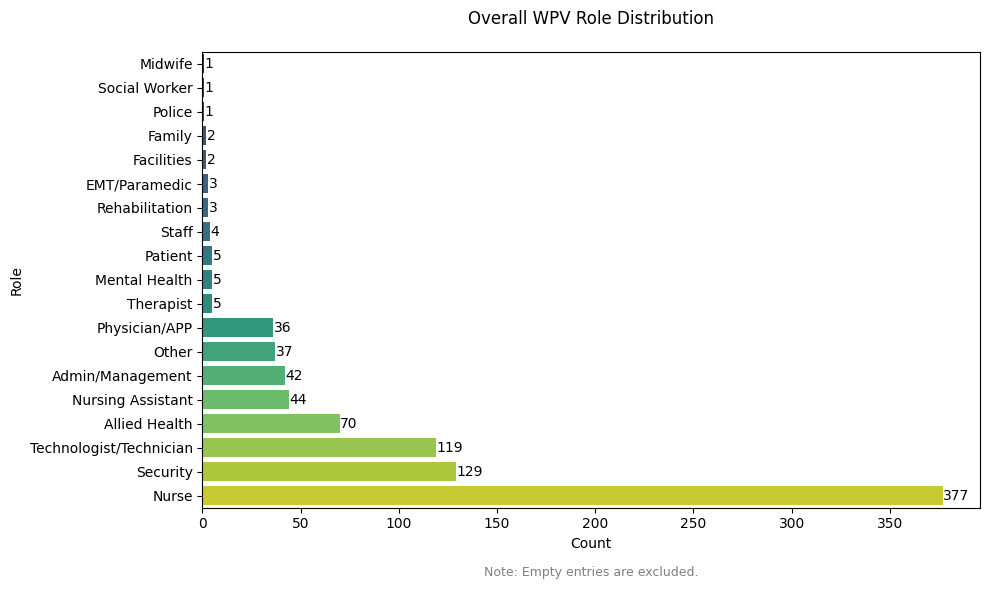

In [78]:
# Filter out empty strings before counting
role_counts = exploded_df[exploded_df['General Role'] != '']['General Role'].value_counts().sort_values(ascending=True)

# Create figure
plt.figure(figsize=(10, 6))
sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')

# Add annotations
for i, v in enumerate(role_counts.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.title('Overall WPV Role Distribution', pad=20)
plt.xlabel('Count')
plt.ylabel('Role')
plt.annotate(
        "Note: Empty entries are excluded.",
        xy=(0.5, -0.15), xycoords="axes fraction",
        ha="center", fontsize=9, color="gray"
    )
plt.tight_layout()
plt.show()